# Regression Analysis-1 - KNN Regression, Decision Tree Regression, Linear Regression

## Import libraries and load dataset

In [1]:
# Dataframe Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

#KNN regression Import
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree Regression Import
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Linear Regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# MSE, RMSE Calc. Import
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [2]:
# Load presaved dataset from seaborn

ice = sns.load_dataset("seaice")

## Data Summary

In [4]:
ice.head()

,Date,Extent
0,1980-01-01,14.200
1,1980-01-03,14.302
2,1980-01-05,14.414
3,1980-01-07,14.518
4,1980-01-09,14.594


In [5]:
ice.tail()

,Date,Extent
13170,2019-12-27,12.721
13171,2019-12-28,12.712
13172,2019-12-29,12.780
13173,2019-12-30,12.858
13174,2019-12-31,12.889


In [6]:
ice.shape

(13175, 2)

In [7]:
# Split 'Date' into 'Year', 'Month' and 'Day', so that we can analyse the 'ice extent' across years and months

ice[['Year', 'Month', 'Day']] = ice['Date'].astype(str).str.split('-', expand=True)

In [8]:
ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13175 entries, 0 to 13174
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13175 non-null  datetime64[ns]
 1   Extent  13175 non-null  float64       
 2   Year    13175 non-null  object        
 3   Month   13175 non-null  object        
 4   Day     13175 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 514.8+ KB


## Data Visualizations

Let's `visualise` the data to understand it better.

### Year-wise Ice Extent Plot

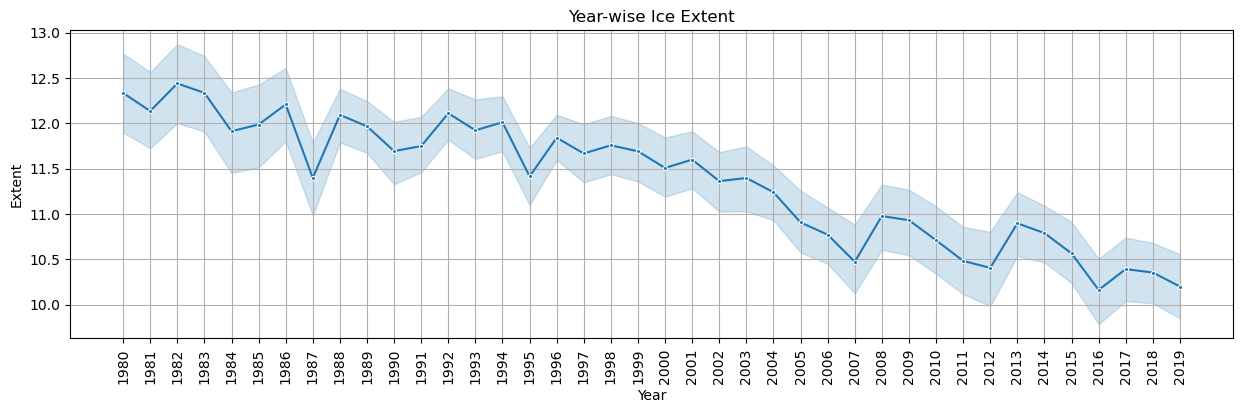

In [12]:
plt.figure(figsize=(15, 4))
sns.lineplot(x='Year', y='Extent', data=ice, marker='.')

plt.title('Year-wise Ice Extent')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


### Month-wise Ice Extent Plot over all years

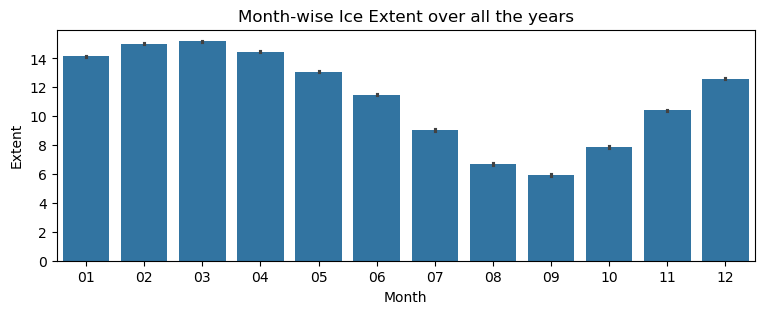

In [14]:
# Month-wise plot
plt.figure(figsize=(9, 3))
sns.barplot(x='Month', y='Extent', data=ice)

plt.title('Month-wise Ice Extent over all the years')
plt.xlabel('Month')
plt.ylabel('Extent')
plt.show()

### Date-wise Ice Extent plot

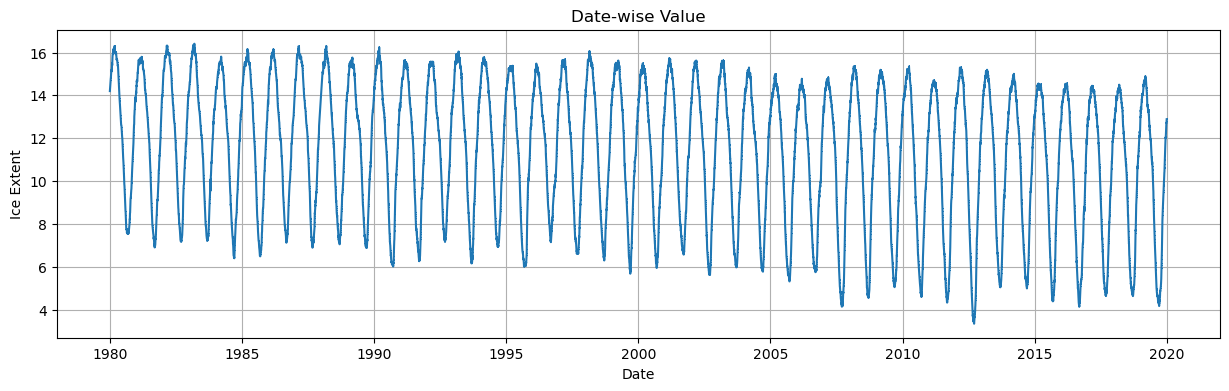

In [16]:
# Date-wise plot
plt.figure(figsize=(15, 4))
sns.lineplot(x='Date', y='Extent', data=ice, marker=',', dashes = False)

plt.title('Date-wise Value')
plt.xlabel('Date')
plt.ylabel('Ice Extent')
plt.grid(True)
plt.show()

In [17]:
ice = ice.drop('Date', axis = 1)

In [18]:
ice.columns

Index(['Extent', 'Year', 'Month', 'Day'], dtype='object')

## Basic EDA

### Datatype conversions

It is best to treat `Year`, `Month` and `Day` as numerical values, because the trend of 'Ice Extent' varies directly with the 'Year' and 'Month' values.
We want to analyse this. Hence, we are converting the above three variables `into numerical data.`

In [22]:
ice["Year"] = ice["Year"].astype("int64")
ice["Month"] = ice["Month"].astype("int64")
ice["Date"] = ice["Day"].astype("int64")
ice = ice.drop('Day', axis = 1)

In [23]:
ice.dtypes

Extent    float64
Year        int64
Month       int64
Date        int64
dtype: object

In [24]:
ice.describe(include = 'float64')

,Extent
count,13175.000000
mean,11.289508
std,3.284901
min,3.340000
25%,8.551500
50%,11.982000
75%,14.204500
max,16.412000


**interpretation:** We can see the different mathematical statistics of the `Ice Extent` column in the above output.

### Let's check for missing values

In [27]:
ice.isnull().values.any()

False

In [28]:
missing_values = ice.isnull().sum()
missing_values

Extent    0
Year      0
Month     0
Date      0
dtype: int64

Let's plot a `heatmap` of missing values.

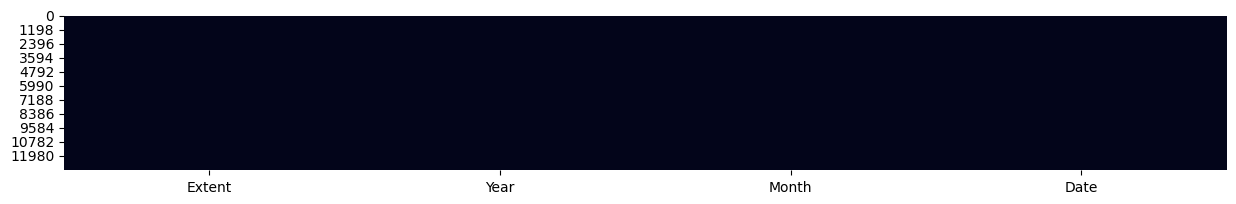

In [30]:
# set the figure size
plt.rcParams["figure.figsize"]=[15,2]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(ice.isnull(), cbar = False)

# display the plot
plt.show()

***We have ensured that there are no missing values in the dataset.***

### Outlier Treatment

Let's check the outliers on the `Extent` column, as in the others, outliers aren't relevant to domain.

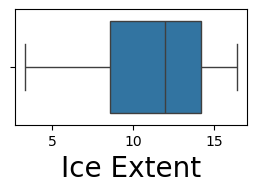

In [34]:
# let's first plot the outliers.
plt.figure(figsize=(3, 1.5))
z = sns.boxplot(x=ice['Extent'], whis=1.5)  # plot the boxplot
z.set_xlabel("Ice Extent", fontsize=20)  # set the x-axis label
plt.show()

**We can observe that there are no outliers in the data.**

## Scaling & Train and Test Split

In [37]:
# select the target variable
Y = ice['Extent']

# select all the independent variables
# by dropping the target variable
X = ice.drop(['Extent'], axis = 1)

### Min-Max Scaling

In [39]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.sample(5)

,0,1,2
4597,0.410256,0.545455,0.200000
12850,1.000000,0.090909,0.300000
7729,0.641026,0.090909,0.033333
4814,0.435897,0.090909,0.266667
7203,0.589744,0.636364,0.833333


In [40]:
# let us now split the dataset into train & test
# test_size: the proportion of data to be included in the testing set
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.20, random_state=197)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("Y_train ",Y_train.shape)

# print the shape of 'y_test'
print("Y_test ",Y_test.shape)

X_train  (10540, 3)
X_test  (2635, 3)
Y_train  (10540,)
Y_test  (2635,)


## KNN Regression

In [42]:
# Train the model with different K values and plot MAPE scores
k_values = np.arange(1,400,25)
train_mape_scores = []
test_mape_scores = []

In [43]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(Y_train, train_pred)
    test_mape = mean_absolute_percentage_error(Y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

In [44]:
test_mape_scores

[0.03975585827038783,
 0.031166579826706352,
 0.03797677830893341,
 0.04331241331133765,
 0.04644509638651704,
 0.04939561263107637,
 0.05189723349940547,
 0.055335196779601116,
 0.058492813131803094,
 0.06214279739779318,
 0.06579386444581768,
 0.07025413377953556,
 0.07400352026778187,
 0.0782700614577204,
 0.08150875182940859,
 0.08358614758577476]

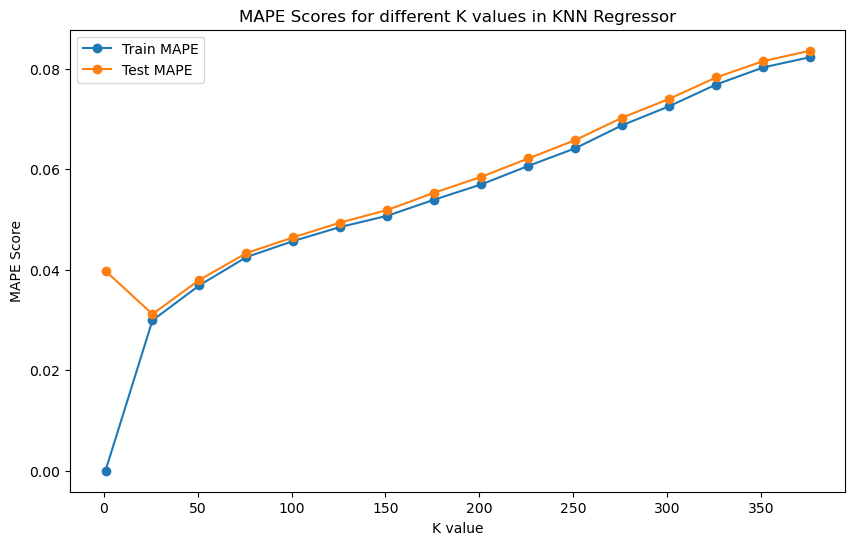

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

In [46]:
model = KNeighborsRegressor(n_neighbors = 50)
model.fit(X_train, Y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = np.sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
print('RMSE value for k= 50 is:', error)

RMSE value for k= 50 is: 0.4521566659908091


In [47]:
knn_pred = model.predict(X_test)
knn_pred

array([10.33732, 15.65754,  6.6503 , ..., 14.64058, 14.64872,  7.88894])

In [48]:
X_test_1 =X_test.iloc[2500,:]
X_test_1

0    0.128205
1    0.181818
2    0.000000
Name: 943, dtype: float64

In [49]:
pred=model.predict([X_test_1]) 
pred

array([15.71636])

## Decision Tree Regression

[Text(0.5, 0.875, 'Month <= 0.409\nsquared_error = 10.715\nsamples = 2635\nvalue = 11.321'), Text(0.25, 0.625, 'Month <= 0.318\nsquared_error = 0.891\nsamples = 1095\nvalue = 14.373'), Text(0.125, 0.375, 'Year <= 0.603\nsquared_error = 0.512\nsamples = 877\nvalue = 14.689'), Text(0.0625, 0.125, 'squared_error = 0.315\nsamples = 477\nvalue = 15.085'), Text(0.1875, 0.125, 'squared_error = 0.338\nsamples = 400\nvalue = 14.217'), Text(0.375, 0.375, 'Year <= 0.577\nsquared_error = 0.401\nsamples = 218\nvalue = 13.103'), Text(0.3125, 0.125, 'squared_error = 0.24\nsamples = 121\nvalue = 13.458'), Text(0.4375, 0.125, 'squared_error = 0.249\nsamples = 97\nvalue = 12.66'), Text(0.75, 0.625, 'Month <= 0.864\nsquared_error = 6.369\nsamples = 1540\nvalue = 9.151'), Text(0.625, 0.375, 'Month <= 0.591\nsquared_error = 4.944\nsamples = 1092\nvalue = 8.184'), Text(0.5625, 0.125, 'squared_error = 2.459\nsamples = 413\nvalue = 10.298'), Text(0.6875, 0.125, 'squared_error = 2.082\nsamples = 679\nvalue = 6

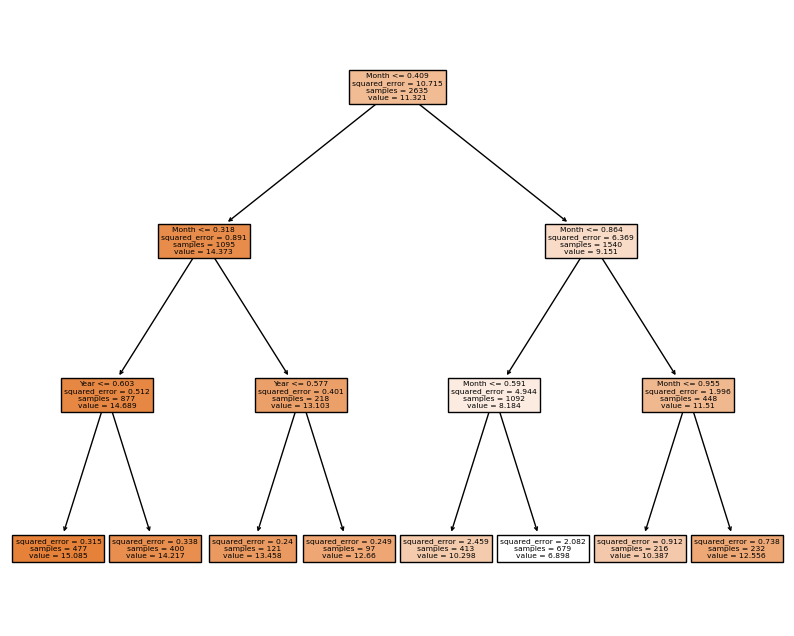

In [62]:
# Create the decision tree regression model
regressor = DecisionTreeRegressor(max_depth = 3)

# Fit the model to the data
regressor.fit(X_test, Y_test)

# Display the decision tree
fig = plt.figure(figsize=(10, 8))
out = tree.plot_tree(regressor, feature_names=['Year', 'Month', 'Date'], filled=True)
print(out)
plt.show()

In [63]:
pd.DataFrame({'features':['Year', 'Month', 'Date'], 'importance':regressor.feature_importances_})

,features,importance
0,Year,0.00789
1,Month,0.99211
2,Date,0.00000


In [64]:
y_pred = regressor.predict(X_test)
y_pred

array([10.38721296, 15.08450943,  6.89759352, ..., 14.216995  ,
       15.08450943,  6.89759352])

In [68]:
# Evaluation (Mean Squared Error)
mse = mean_squared_error(Y_test, y_pred)

In [70]:
mse

1.1901035797212691

In [72]:
regressor.score(X_train, Y_train)

0.8880764338452771

## Linear Regression

In [ ]:
# fit regression model

lm = LinearRegression()

lm = lm.fit(X_train,Y_train)

In [ ]:
lm.intercept_, lm.coef_

In [ ]:
lm.score(X_train,Y_train)

In [ ]:
yhat = lm.predict(X_train)
yhat

In [ ]:
lm.intercept_ + lm.coef_ * X_train

In [ ]:
np.corrcoef(Y_train, yhat)**2

In [ ]:
error = Y_train - yhat
error

In [ ]:
abs_error = np.abs(error)
mae = np.mean(abs_error) # mean absolute error
mae

In [ ]:
# calculate mean of absolute percentage error
np.mean(np.abs(error / Y_train)) * 100

In [ ]:
# sum of squares of error
sse = np.sum(error ** 2)

In [ ]:
# sum of squares total
sst = np.sum((Y_train - Y_train.mean())**2)

In [ ]:
1- (sse/sst)

In [ ]:
# predicting for a new value of X
# say 13

lm.intercept_ + lm.coef_ * 13

In [ ]:
# plot the regression line

X_min = X_train.min()
yhat_min = lm.intercept_ + lm.coef_ * X_min
X_max = X_train.max()
yhat_max = lm.intercept_ + lm.coef_ * X_max

In [ ]:
# fit statsmodels OLS regression model
X = sm.add_constant(X_train)

In [ ]:
X

In [ ]:
ols_model = sm.OLS(Y_train, X).fit()
ols_yhat = ols_model.predict(X)

In [ ]:
yhat, ols_yhat

In [ ]:
ols_model.summary()

In [ ]:
# Prediction
y_pred = lm.predict(X_test)
y_pred

In [83]:
# Evaluation (Mean Squared Error)
mse = mean_squared_error(Y_test, y_pred)
mse

6.011863876363549